In [1]:
# Loading Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

# See max columns
pd.set_option('display.max_columns', None)

In [2]:
#loading data set
adult = pd.read_csv("Clean_Data.csv")

#getting columns names
adult.columns

Index(['SRVY_YR', 'URBRRL', 'REGION', 'AGEP_A', 'SEX_A', 'HISP_A',
       'RACEALLP_A', 'MLTFAMFLG_A', 'PHSTAT_A', 'HYPEV_A', 'CHLEV_A',
       'ANGEV_A', 'MIEV_A', 'STREV_A', 'ASEV_A', 'NUMCAN_A', 'HEIGHTTC_A',
       'WEIGHTLBTC_A', 'BMICAT_A', 'DISAB3_A', 'NOTCOV_A', 'PAYWORRY_A',
       'URGNT12MTC_A', 'EMERG12MTC_A', 'ANXLEVEL_A', 'DEPLEVEL_A',
       'SMKCIGST_A', 'SMKECIGST_A', 'LEGMSTAT_A', 'PARSTAT_A', 'CITZNSTP_A',
       'SCHCURENR_A', 'POVRATTC_A', 'FSNAP12M_A', 'FDSCAT4_A', 'HOUTENURE_A',
       'CHDEV_A', 'DIA_STATUS'],
      dtype='object')

In [3]:
#Droping columns
adult_new = adult.drop(columns = ['CHDEV_A','HOUTENURE_A','SCHCURENR_A','CITZNSTP_A','PARSTAT_A','LEGMSTAT_A','MLTFAMFLG_A',
                                  'FSNAP12M_A','HEIGHTTC_A','WEIGHTLBTC_A'])

In [4]:
adult_new.head()

,SRVY_YR,URBRRL,REGION,AGEP_A,SEX_A,HISP_A,RACEALLP_A,PHSTAT_A,HYPEV_A,CHLEV_A,ANGEV_A,MIEV_A,STREV_A,ASEV_A,NUMCAN_A,BMICAT_A,DISAB3_A,NOTCOV_A,PAYWORRY_A,URGNT12MTC_A,EMERG12MTC_A,ANXLEVEL_A,DEPLEVEL_A,SMKCIGST_A,SMKECIGST_A,POVRATTC_A,FDSCAT4_A,DIA_STATUS
0,2022,2,3,85,1,2,1,2,1,2,2,2,2,2,0,2,2,2,3,0,0,2.0,0.0,3,3,1.92,1,0.0
1,2022,4,3,64,1,2,1,3,1,1,1,2,2,2,1,4,2,2,3,0,0,1.0,0.0,3,3,10.30,1,0.0
2,2022,4,3,37,2,2,1,3,2,2,2,2,2,1,0,4,2,2,3,1,1,3.0,1.0,4,3,9.36,1,3.0
3,2022,4,3,72,2,2,1,2,1,2,2,2,2,1,0,4,2,2,3,0,0,0.0,0.0,4,3,3.66,1,0.0
4,2022,1,3,84,2,2,2,2,1,2,2,2,2,2,0,3,2,2,2,0,0,1.0,0.0,4,3,0.69,1,0.0


In [5]:
# Checking for null values
adult_new.isnull().sum()

SRVY_YR         0
URBRRL          0
REGION          0
AGEP_A          0
SEX_A           0
HISP_A          0
RACEALLP_A      0
PHSTAT_A        0
HYPEV_A         0
CHLEV_A         0
ANGEV_A         0
MIEV_A          0
STREV_A         0
ASEV_A          0
NUMCAN_A        0
BMICAT_A        0
DISAB3_A        0
NOTCOV_A        0
PAYWORRY_A      0
URGNT12MTC_A    0
EMERG12MTC_A    0
ANXLEVEL_A      0
DEPLEVEL_A      0
SMKCIGST_A      0
SMKECIGST_A     0
POVRATTC_A      0
FDSCAT4_A       0
DIA_STATUS      0
dtype: int64

In [6]:
#Check for data types
adult_new.dtypes

SRVY_YR           int64
URBRRL            int64
REGION            int64
AGEP_A            int64
SEX_A             int64
HISP_A            int64
RACEALLP_A        int64
PHSTAT_A          int64
HYPEV_A           int64
CHLEV_A           int64
ANGEV_A           int64
MIEV_A            int64
STREV_A           int64
ASEV_A            int64
NUMCAN_A          int64
BMICAT_A          int64
DISAB3_A          int64
NOTCOV_A          int64
PAYWORRY_A        int64
URGNT12MTC_A      int64
EMERG12MTC_A      int64
ANXLEVEL_A      float64
DEPLEVEL_A      float64
SMKCIGST_A        int64
SMKECIGST_A       int64
POVRATTC_A      float64
FDSCAT4_A         int64
DIA_STATUS      float64
dtype: object

In [7]:
# Checking for unique variables for each column
for column in adult_new.columns:
    unique_values = adult_new[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'SRVY_YR': [2022 2021 2020 2019]
Unique values in column 'URBRRL': [2 4 1 3]
Unique values in column 'REGION': [3 4 1 2]
Unique values in column 'AGEP_A': [85 64 37 72 84 31 81 68 57 78 59 27 58 38 83 46 42 19 74 32 25 45 47 62
 61 35 44 24 55 69 63 43 80 60 23 65 36 53 50 76 20 26 52 39 41 73 40 67
 34 71 29 18 21 33 30 77 49 82 51 48 22 79 75 56 70 28 66 54 97 99]
Unique values in column 'SEX_A': [1 2]
Unique values in column 'HISP_A': [2 1]
Unique values in column 'RACEALLP_A': [1 2 6 3 4 5]
Unique values in column 'PHSTAT_A': [2 3 1 5 4]
Unique values in column 'HYPEV_A': [1 2]
Unique values in column 'CHLEV_A': [2 1]
Unique values in column 'ANGEV_A': [2 1]
Unique values in column 'MIEV_A': [2 1]
Unique values in column 'STREV_A': [2 1]
Unique values in column 'ASEV_A': [2 1]
Unique values in column 'NUMCAN_A': [0 1 2 3 4]
Unique values in column 'BMICAT_A': [2 4 3 1]
Unique values in column 'DISAB3_A': [2 1]
Unique values in column 'NOTCOV_A': [2 1]
Unique

In [8]:
# Modified columns for one hot encoding
adult_modified = adult_new[['SRVY_YR', 'URBRRL', 'REGION', 'RACEALLP_A', 'PHSTAT_A', 'NUMCAN_A', 'BMICAT_A',
                            'PAYWORRY_A', 'URGNT12MTC_A', 'EMERG12MTC_A', 'ANXLEVEL_A', 'DEPLEVEL_A',
                            'SMKCIGST_A', 'SMKECIGST_A', 'FDSCAT4_A']]

# One hot encoding encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(adult_modified)

# Creating DataFrame from encoded features
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(adult_modified.columns))

# Print the resulting DataFrame
one_hot_df

,SRVY_YR_2019,SRVY_YR_2020,SRVY_YR_2021,SRVY_YR_2022,URBRRL_1,URBRRL_2,URBRRL_3,URBRRL_4,REGION_1,REGION_2,REGION_3,REGION_4,RACEALLP_A_1,RACEALLP_A_2,RACEALLP_A_3,RACEALLP_A_4,RACEALLP_A_5,RACEALLP_A_6,PHSTAT_A_1,PHSTAT_A_2,PHSTAT_A_3,PHSTAT_A_4,PHSTAT_A_5,NUMCAN_A_0,NUMCAN_A_1,NUMCAN_A_2,NUMCAN_A_3,NUMCAN_A_4,BMICAT_A_1,BMICAT_A_2,BMICAT_A_3,BMICAT_A_4,PAYWORRY_A_1,PAYWORRY_A_2,PAYWORRY_A_3,URGNT12MTC_A_0,URGNT12MTC_A_1,URGNT12MTC_A_2,URGNT12MTC_A_3,URGNT12MTC_A_4,URGNT12MTC_A_5,EMERG12MTC_A_0,EMERG12MTC_A_1,EMERG12MTC_A_2,EMERG12MTC_A_3,EMERG12MTC_A_4,ANXLEVEL_A_0.0,ANXLEVEL_A_1.0,ANXLEVEL_A_2.0,ANXLEVEL_A_3.0,DEPLEVEL_A_0.0,DEPLEVEL_A_1.0,DEPLEVEL_A_2.0,DEPLEVEL_A_3.0,SMKCIGST_A_1,SMKCIGST_A_2,SMKCIGST_A_3,SMKCIGST_A_4,SMKCIGST_A_5,SMKECIGST_A_1,SMKECIGST_A_2,SMKECIGST_A_3,SMKECIGST_A_4,FDSCAT4_A_1,FDSCAT4_A_2,FDSCAT4_A_3,FDSCAT4_A_4
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
103814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
103815,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
103816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
#Droping old columns for new one
adult_df = pd.concat([adult_new, one_hot_df], axis=1)

adult_df = adult_df.drop(['SRVY_YR', 'URBRRL', 'REGION', 'RACEALLP_A', 'PHSTAT_A', 'NUMCAN_A', 'BMICAT_A',
                            'PAYWORRY_A', 'URGNT12MTC_A', 'EMERG12MTC_A', 'ANXLEVEL_A', 'DEPLEVEL_A',
                            'SMKCIGST_A', 'SMKECIGST_A', 'FDSCAT4_A'], axis = 1)

In [10]:
#dropping all type 1 Diabetes
adult_df = adult_df.drop(adult_df[adult_df['DIA_STATUS'] == 2].index)

#having only non-diabetes with diabetes type 2
adult_df['DIA_STATUS'] = adult_df['DIA_STATUS'].replace(1, 0)
adult_df['DIA_STATUS'] = adult_df['DIA_STATUS'].replace(3, 1)

# Looking at diabetes number
adult_df.groupby(['DIA_STATUS'])['DIA_STATUS'].count()

DIA_STATUS
0.0    94011
1.0     3255
Name: DIA_STATUS, dtype: int64

In [11]:
# Split data
X = adult_df.drop('DIA_STATUS', axis = 1)
y = adult_df['DIA_STATUS']


In [12]:
#Scaling and creating the split for the data
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [13]:
# Using LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

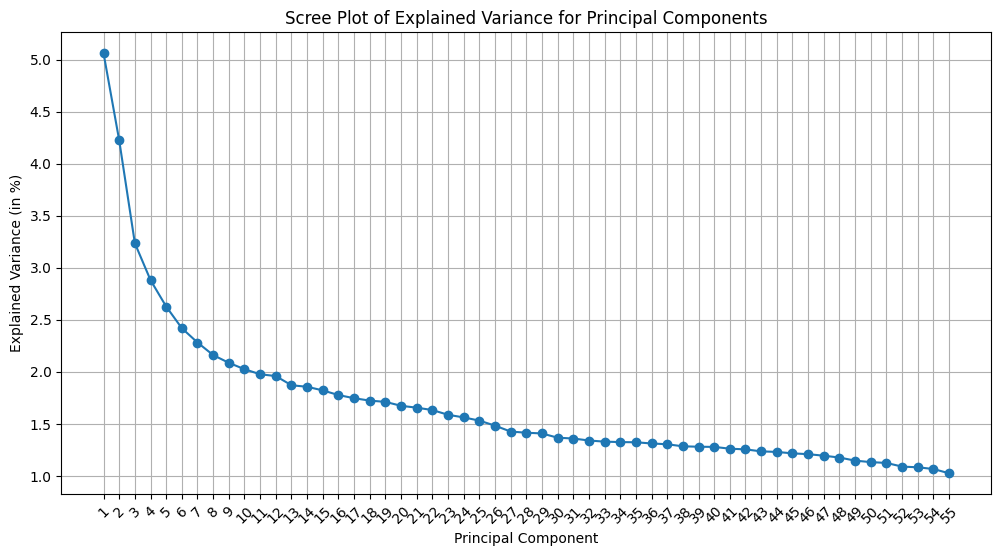

[0.05062152 0.04225203 0.03236842 0.02882336 0.02628461 0.02420462
 0.02282669 0.02162132 0.02087584 0.02026257 0.01977525 0.01960431
 0.01872041 0.01857343 0.01822678 0.0177782  0.01747553 0.0172443
 0.01712321 0.01674613 0.01656435 0.01633892 0.01588194 0.01563064
 0.01532267 0.01483917 0.01427075 0.01415822 0.01408982 0.01368005
 0.01360199 0.01341077 0.01330087 0.01325984 0.0132401  0.01312642
 0.0130508  0.01285367 0.01281197 0.01279682 0.0126235  0.01255965
 0.0123674  0.01231271 0.01217614 0.01209838 0.01194927 0.01177395
 0.0114771  0.01133473 0.01125445 0.01090414 0.01083571 0.0106742
 0.01026176]


In [24]:
# PCA
pca = PCA(n_components=55)
pca_fit = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_

# Create a scree plot to visualize the explained variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(explained_variance) + 1),rotation=45)

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

print(pca.explained_variance_ratio_)

In [15]:

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=250,
                                    random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 0.9664850416366814
[[18802     1]
 [  651     0]]


In [23]:
# https://xgboost.readthedocs.io/en/latest/parameter.html
# https://www.kaggle.com/code/wongguoxuan/eda-pca-xgboost-classifier-for-beginners

import xgboost

model = XGBClassifier()
model.fit(X_train,y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 96.56%
Accuracy : 0.9655597820499641
[[18778    25]
 [  645     6]]
